In [20]:
import numpy as np
import matplotlib.pyplot as plt
#history=np.load('my_history.npy',allow_pickle='TRUE').item()
#print(history)

In [21]:
unsupervised_valid_loss = []
supervised_valid_loss = []
for i in range((50)):
    unsupervised_valid_loss.append(np.load('./epoch_' + str(i) + '/valid_loss_' + str(i) + '.npy'))
    supervised_valid_loss.append(np.load('./epoch_' + str(i) + '/valid_loss_sup_' + str(i) + '.npy'))

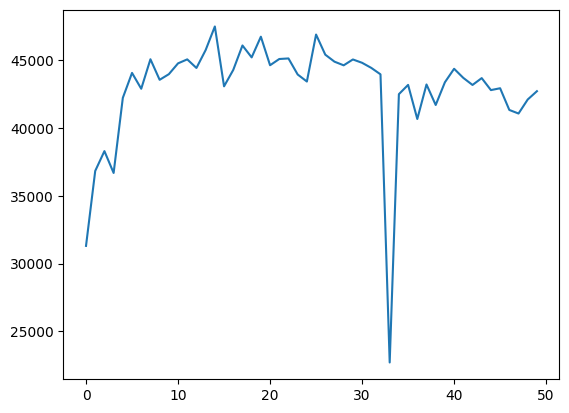

In [22]:
plt.plot(unsupervised_valid_loss)

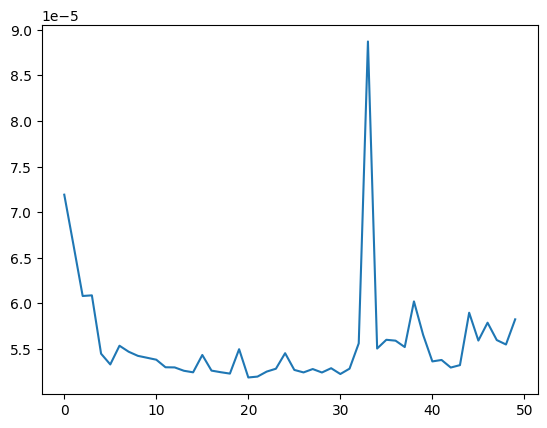

In [23]:
plt.plot(supervised_valid_loss)

In [24]:
wav = np.load('wavelet_spectra.npy',allow_pickle=True)
wav_params = np.load('wavelet_spectra_params.npy',allow_pickle=True)
pc = np.load('PCA_spectra.npy',allow_pickle=True)
pc_params = np.load('PCA_spectra_params.npy',allow_pickle=True)
sg = np.load('SG_spectra.npy',allow_pickle=True)
sg_params = np.load('SG_spectra_params.npy',allow_pickle=True)
gt = np.load('network_pred_GT_corrected_normalised.npy',allow_pickle=True)
pred = np.load('network_pred_corrected_normalised.npy',allow_pickle=True)

In [ ]:
net_pred_MSE =np.mean(np.mean((pred - gt)**2,axis=1))

In [25]:
wav_MSEs = []
for i in range(np.shape(wav)[0]):
    wav_MSEs.append(np.mean(np.mean((wav[i] - gt)**2,axis=1)))

In [28]:
plt.plot(np.squeeze(wav_params),np.squeeze(wav_MSEs))

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [ ]:
index=50
plt.plot(gt[index])
plt.plot(np.squeeze(wav[2][index]))
plt.plot(wav[2][index])



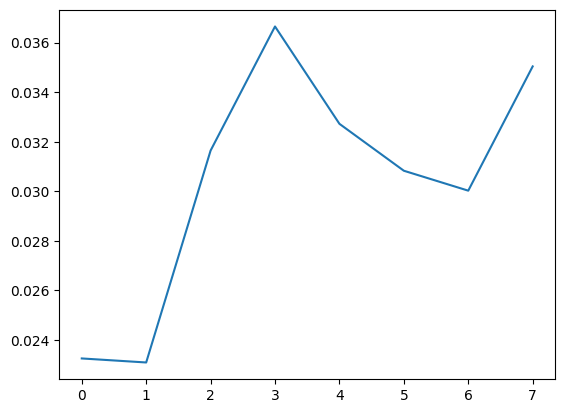

In [12]:
PCA_MSEs = []
for i in range(np.shape(pc)[0]):
    PCA_MSEs.append(np.mean(np.mean((pc[i] - gt)**2,axis=1)))

In [ ]:
plt.plot(PCA_params,PCA_MSEs)

In [ ]:
plt.plot(gt[index])
plt.plot(np.squeeze(pc[2][index]))
plt.plot(pc[2][index])

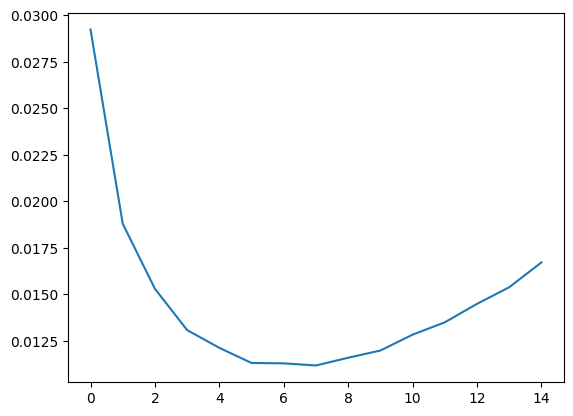

In [13]:
SG_MSEs = []
for i in range(np.shape(sg)[0]):
    SG_MSEs.append(np.mean(np.mean((sg[i] - gt)**2,axis=1)))

ValueError: x and y can be no greater than 2D, but have shapes (15,) and (15, 12694, 500)

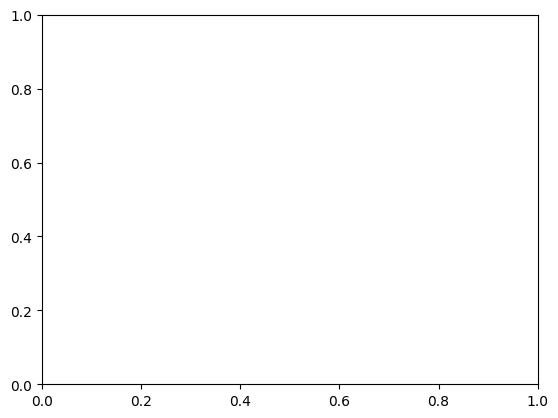

In [14]:
plt.plot(SG_params, SG_MSEs)

In [ ]:
plt.plot(gt[index])
plt.plot(np.squeeze(sg[2][index]))
plt.plot(sg[2][index])